Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']
Total Entropy of Dataset: 0.9526351224018599
mean radius:Info Gain=0.3416
mean texture:Info Gain=0.1445
mean perimeter:Info Gain=0.3507
mean area:Info Gain=0.3416
mean smoothness:Info Gain=0.0660
mean compactness:Info Gain=0.2325
mean concavity:Info Gain=0.3695
mean concave points:Info Gain=0.3995
mean symmetry:Info Gain=0.0627
mean fractal dimension:Info Gain=0.0000
radius error:Info Gain=

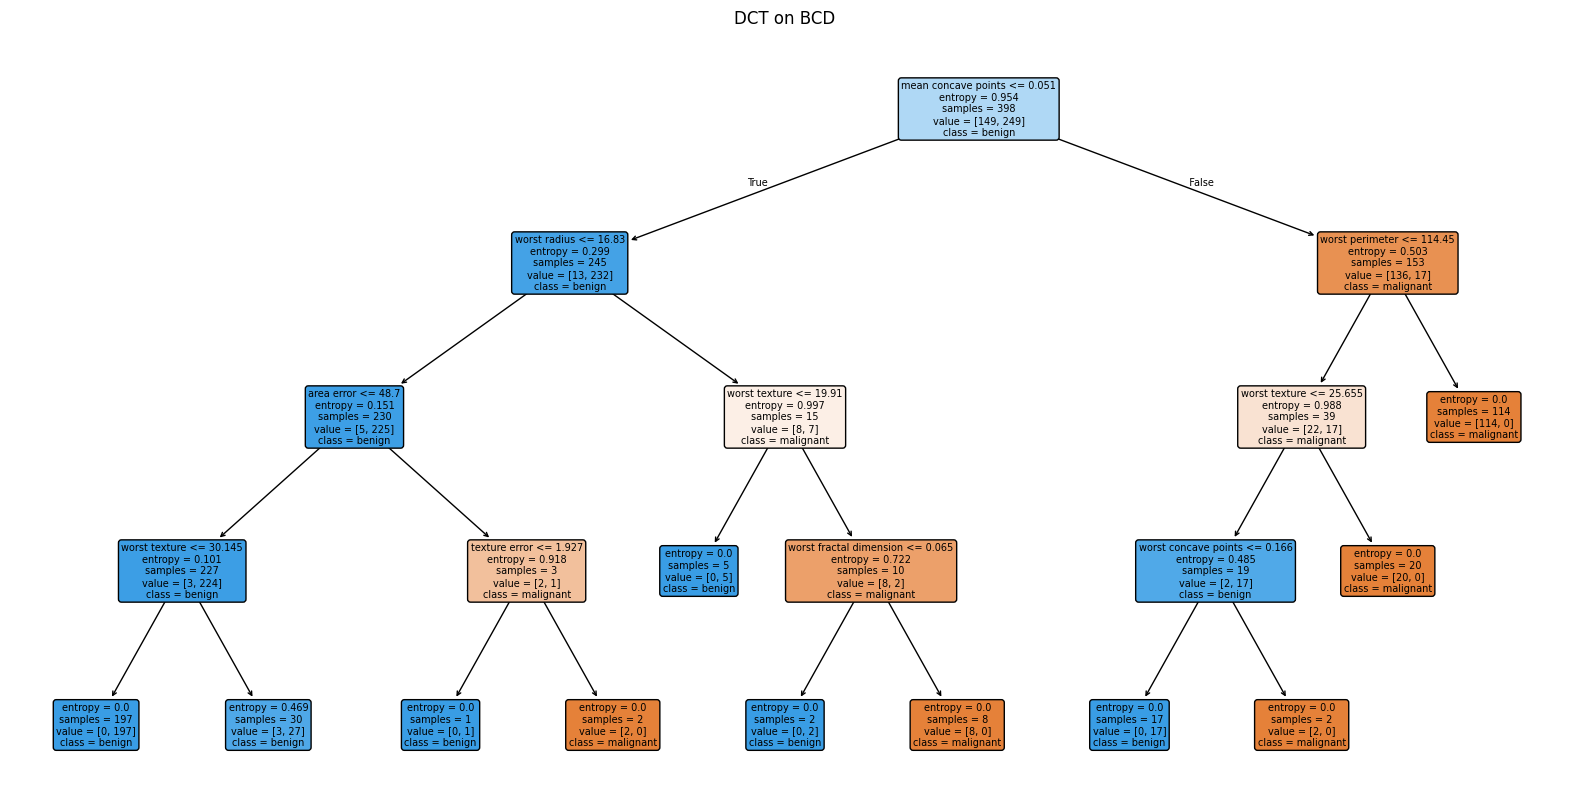

New Prediction for new Value:
Class Name: benign


In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from collections import Counter

data=load_breast_cancer()
x=data.data
y=data.target
feature_names=data.feature_names
target_names=data.target_names

print("Feature Names:", feature_names)
print("Target Names:", target_names)

def calculate_entropy(labels):
    total=len(labels)
    counts=Counter(labels)
    entropy=0.0
    for count in counts.values():
        p=count/total
        entropy -=p*np.log2(p)
    return entropy

entropy_dataset=calculate_entropy(y)
print("Total Entropy of Dataset:", entropy_dataset)

for i, feature in enumerate(feature_names):
    feature_values=x[:,i]
    median_value=np.median(feature_values)
    left_mask=feature_values<=median_value
    right_mask=feature_values>median_value
    y_left=y[left_mask]
    y_right=y[right_mask]
    entropy_left=calculate_entropy(y_left)
    entropy_right=calculate_entropy(y_right)
    weighted_entropy=(len(y_left)/len(y))*entropy_left+(len(y_right)/len(y))*entropy_right
    info_gain=entropy_dataset-weighted_entropy
    print(f"{feature}:Info Gain={info_gain:.4f}")

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
clf=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

print("\n Classification Report: ",classification_report(y_pred,y_test))
print("\n Accuracy Score: ",accuracy_score(y_pred,y_test))

plt.figure(figsize=(20,10))
plot_tree(clf,feature_names=feature_names,class_names=target_names,rounded=True,filled=True)
plt.title("DCT on BCD")
plt.show()

random_sample=np.random.normal(loc=0,scale=1,size=(1,30))
prediction=clf.predict(random_sample)

print("New Prediction for new Value:")
print("Class Name:", target_names[prediction[0]])

